**Import libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

**Read Dataset files**

In [4]:
cus_seg = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Customer%20Spending%20Score.csv')

In [5]:
cus_seg.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [6]:
cus_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
cus_seg.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
cus_seg.shape

(200, 4)

**Define X(target)**

In [9]:
X = cus_seg[[ 'Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
X.shape

(200, 2)

In [11]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                 15000                      39
1                 15000                      81
2                 16000                       6
3                 16000                      77
4                 17000                      40
..                  ...                     ...
195              120000                      79
196              126000                      28
197              126000                      74
198              137000                      18
199              137000                      83

[200 rows x 2 columns]


**Scaling define dataset**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

**Choosing the number of Clusters**

**WCSS-> Within Clusters Sum of Squares**

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = [ ]
for i in range(1,11):
  km =KMeans(n_clusters = i, init = 'k-means++', random_state = 2529)
  km.fit(X_scaled)

  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [16]:
wcss

[399.99999999999994,
 269.01679374906655,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.86475569922555,
 37.182925370178474,
 32.33081392367578,
 29.897635726100987]

**Plot an elbow graph**

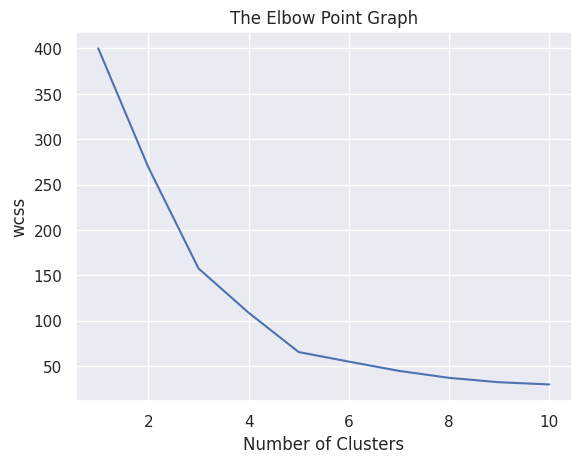

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

**Optimum Number of Clusters = 5**

**Training the K-Means clustering Model**

In [17]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2529)


In [19]:
y = km.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

**Visualizing all the Clusters**

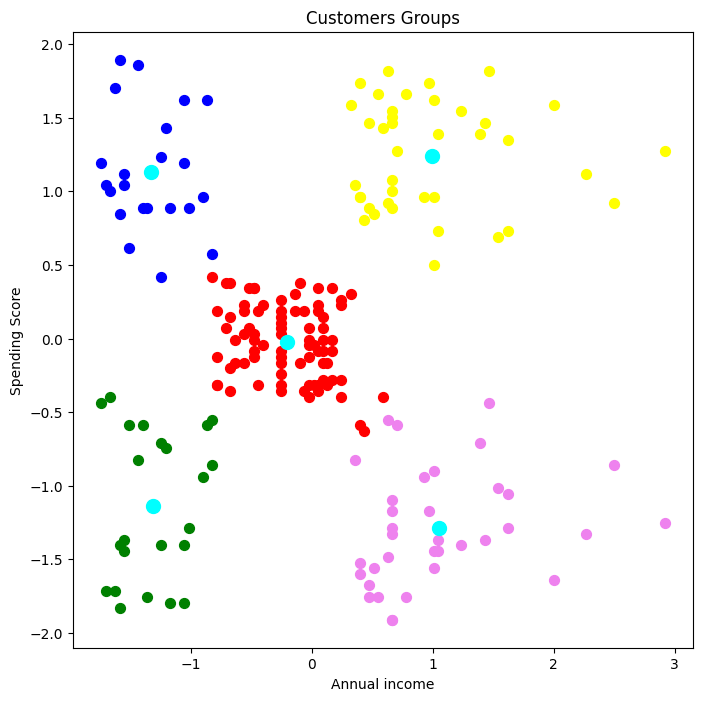

In [24]:
# ploting all the Clusters and labels on them
plt.figure(figsize=(8,8))
plt.scatter(X_scaled[y==0,0],X_scaled[y==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[y==1,0],X_scaled[y==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[y==2,0],X_scaled[y==2,1],s=50, c='yellow', label='Cluster 3')
plt.scatter(X_scaled[y==3,0],X_scaled[y==3,1],s=50, c='violet', label='Cluster 4')
plt.scatter(X_scaled[y==4,0],X_scaled[y==4,1],s=50, c='blue', label='Cluster 5')

# ploting Centroid to all Clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100 ,c= 'cyan', label='centroids')
plt.title('Customers Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()
